# Polynomial Regression

> One variable, but different powers of it.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Importing the dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")

In [3]:
X = dataset.iloc[ : ,1 : -1].values #because we dont need the names of the position because it is represented by the number values (i.e., 1-10)
y = dataset.iloc[ : , -1].values

In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


we won't split the dataset into train and test batches because the data we have is too limited.


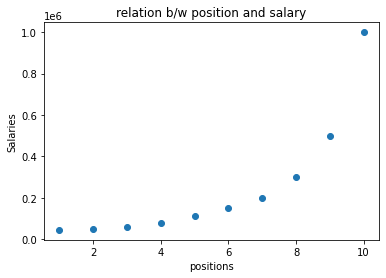

In [6]:
plt.scatter(X,y)
plt.title('relation b/w position and salary')
plt.xlabel('positions')
plt.ylabel('Salaries')
plt.show()

Now because the relation between X and y is curved, polynomial linear regression model would work the best.
however, we will also apply normal simple linear regression on it just in case.

## Training the Linear Regression model on the whole dataset

In [7]:
# SIMPLE LINEAR REGRESSION MODEL

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [9]:
# we will first make a vector containg x, x^2 ... x^n

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) #first we will only try for n=2, if the model doesn't work correctly, we will keep on changing it however required.

# transformation of the matrix of features

X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 ^^ polynomial regression model built ^^

## Visualising the Linear Regression results

Text(0, 0.5, 'salary')

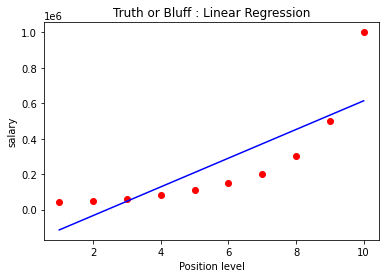

In [11]:
plt.scatter(X, y, color = 'red') #REAL RESULTS
plt.plot(X, lin_reg.predict(X), color = 'blue') #LINEAR REGRESSION MODEL RESULTS
plt.title('Truth or Bluff : Linear Regression')
plt.xlabel('Position level')
plt.ylabel('salary')

## Visualising the Polynomial Regression results

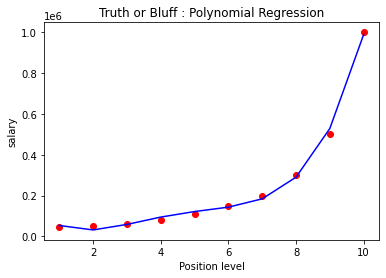

In [12]:
plt.scatter(X, y, color = 'red') #REAL RESULTS
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue') #LINEAR REGRESSION MODEL RESULTS
plt.title('Truth or Bluff : Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

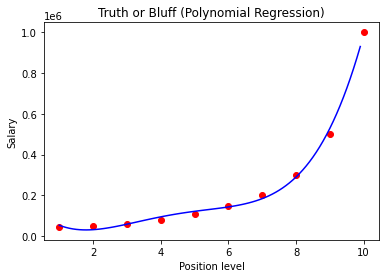

In [13]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression


We are predicting for X=6.5 because, if you look at the dataset and 
the question explained in the video tutorial,
the person is  a Regional Manager but with more experience, so to predict his salaary, 
his job position would be somewhere between 6 and 7, so we take 6.5 .

To get the result we have to give it an array. [[6.5]] is an array 
with 1 row and 1 column.
[[6.5,2]]: array with 1 row and 2 columns
[[6.5,2][3,5]] :array with 2 rows and 2 columns



In [16]:
lin_reg.predict([[6.5]]) 

array([330378.78787879])

this predicted salary is wayyyy higher than what it should be in real life.

## Predicting a new result with Polynomial Regression

In [19]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

# this is the best prediction.
# this is an honest person